In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ridingmowerscsv/RidingMowers.csv


In [2]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier
import matplotlib.pylab as plt

In [3]:
mower_df=pd.read_csv('../input/ridingmowerscsv/RidingMowers.csv')
mower_df.head()

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner


In [4]:
mower_df['Number']=mower_df.index+1
mower_df.head()

,Income,Lot_Size,Ownership,Number
0,60.0,18.4,Owner,1
1,85.5,16.8,Owner,2
2,64.8,21.6,Owner,3
3,61.5,20.8,Owner,4
4,87.0,23.6,Owner,5


In [5]:
trainData,validData=train_test_split(mower_df,test_size=0.4,random_state=26)
newHousehold=pd.DataFrame([{'Income':60,'Lot_Size':20}])
newHousehold

,Income,Lot_Size
0,60,20


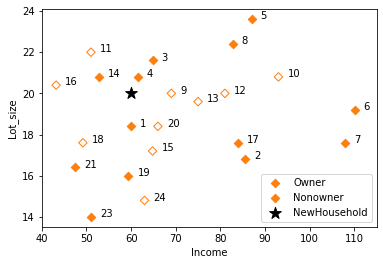

In [6]:
#scatter plot
def plotDataset(ax,data,showLabel=True,**kwargs):
    subset=data.loc[data['Ownership']=='Owner']
    ax.scatter(subset.Income,subset.Lot_Size,marker='D',label='Owner' if showLabel else None,color='C1',**kwargs)
    subset=data.loc[data['Ownership']=='Nonowner']
    ax.scatter(subset.Income,subset.Lot_Size,marker='D',label='Nonowner' if showLabel else None,color='C1',**kwargs)
    plt.xlabel('Income')
    plt.ylabel('Lot_Size')
    for _,row in data.iterrows():
        ax. annotate(row.Number,(row.Income+2,row.Lot_Size))
fig, ax=plt.subplots()
plotDataset(ax,trainData)
plotDataset(ax,validData,showLabel=False,facecolors='none')
ax.scatter(newHousehold.Income,newHousehold.Lot_Size,marker='*',label='NewHousehold',color='black',s=150)
plt.xlabel('Income')
plt.ylabel('Lot_size')
handles,labels=ax.get_legend_handles_labels()
ax.set_xlim(40,115)
ax.legend(handles,labels,loc=4)
plt.show()

In [7]:
scaler=preprocessing.StandardScaler()
scaler.fit(trainData[['Income','Lot_Size']])
mowerNorm= pd.concat([pd.DataFrame(scaler.transform(mower_df[['Income','Lot_Size']]),columns=['zIncome','zLot_size'])
                      ,mower_df[['Ownership','Number']]],axis=1)
mowerNorm

,zIncome,zLot_size,Ownership,Number
0,-0.477910,-0.174908,Owner,1
1,0.680365,-0.787085,Owner,2
2,-0.259882,1.049447,Owner,3
3,-0.409776,0.743358,Owner,4
4,0.748499,1.814668,Owner,5
5,1.797760,0.131181,Owner,6
6,1.702373,-0.480996,Owner,7
7,0.557724,1.355535,Owner,8
8,-0.069107,0.437269,Owner,9
9,1.021034,0.743358,Owner,10


In [8]:
trainNorm=mowerNorm.iloc[trainData.index]
valdNorm=mowerNorm.iloc[validData.index]
newHouseholdNorm=pd.DataFrame(scaler.transform(newHousehold),columns=['zIncome','zLot_size'])

In [9]:
knn=NearestNeighbors(n_neighbors=3)
knn.fit(trainNorm[['zIncome','zLot_size']])
distances,indices=knn.kneighbors(newHouseholdNorm)
print(trainNorm.iloc[indices[0],:])

     zIncome  zLot_size Ownership  Number
3  -0.409776   0.743358     Owner       4
13 -0.804953   0.743358  Nonowner      14
0  -0.477910  -0.174908     Owner       1


In [10]:
train_x=trainNorm[['zIncome','zLot_size']]
train_y=trainNorm['Ownership']
valid_x=valdNorm[['zIncome','zLot_size']]
valid_y=valdNorm['Ownership']
result=[]
for k in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=k).fit(train_x,train_y)
    result.append({'k':k,'accuracy':accuracy_score(valid_y,knn.predict(valid_x))})
result=pd.DataFrame(result)
print(result)

     k  accuracy
0    1       0.6
1    2       0.7
2    3       0.8
3    4       0.9
4    5       0.7
5    6       0.9
6    7       0.9
7    8       0.9
8    9       0.9
9   10       0.8
10  11       0.8
11  12       0.9
12  13       0.4
13  14       0.4


In [11]:
mower_x=mowerNorm[['zIncome','zLot_size']]
mower_y=mowerNorm['Ownership']
knn=KNeighborsClassifier(n_neighbors=4).fit(mower_x,mower_y)
distances,indices=knn.kneighbors(newHouseholdNorm)
print(knn.predict(newHouseholdNorm))
print('distances',distances)
print(mowerNorm.iloc[indices[0],:])

['Owner']
distances [[0.31358009 0.40880312 0.44793643 0.61217726]]
     zIncome  zLot_size Ownership  Number
3  -0.409776   0.743358     Owner       4
8  -0.069107   0.437269     Owner       9
13 -0.804953   0.743358  Nonowner      14
0  -0.477910  -0.174908     Owner       1
